# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


In [19]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [21]:
from PIL import Image, ImageOps
from numpy import asarray
import numpy as np

directory = 'data/png'
directory_r = 'data/png_r/png_r/'
definition_px = IMAGE_SIZE
count = 0
for subdirectory in os.listdir(directory):
    sub = directory+'/'+subdirectory
    for filename in os.listdir(sub):
        count+=1
        
print("Nombre d'images dans le dataset :",count)
    
dataset = np.zeros([count,definition_px*definition_px])
count = 0

for subdirectory in os.listdir(directory):
    sub = directory+'/'+subdirectory
    for filename in os.listdir(sub):
        f = os.path.join(sub,filename)
        # load the image
        im = np.array(Image.open(f).convert('L'))
        
        # Resize image and convert in greycolor
        load_img_rz = np.array(Image.fromarray(im).resize((definition_px,definition_px)))
        # Save the image in jpeg
        Image.fromarray(load_img_rz).save(directory_r + 'r_' +subdirectory +'_'+filename)
        
print("Transformation des datas terminée")


Nombre d'images dans le dataset : 20000


KeyboardInterrupt: 

Pour agrandir le dataset :

In [ ]:
        # create Pillow image
        true_img = Image.fromarray(load_img_rz)
        #Flip image
        im_flip = ImageOps.flip(true_img)
        im_flip.save(directory_r + 'f_'+subdirectory +'_'+filename)
        load_img_flip = np.array(im_flip)
        #Mirror image
        im_mirror = ImageOps.mirror(true_img)
        im_mirror.save(directory_r + 'm_'+subdirectory +'_'+filename)
        load_img_mirror = np.array(im_mirror)

Pour créer un tableau numpy des datas

In [ ]:
        rz = np.zeros([1,load_img_rz.size])
        flip = np.zeros([1,load_img_flip.size])
        mirror = np.zeros([1,load_img_mirror.size])
        k = 0
        for i in range(definition_px):
            for j in range(definition_px):
                rz[0,k] = load_img_rz[i,j]
                flip[0,k] = load_img_flip[i,j]
                mirror[0,k] = load_img_mirror[i,j]
                k+=1
                
        dataset[count,:] = rz[0,:]
        count +=1        
        dataset[count,:] = flip[0,:]
        count +=1   
        dataset[count,:] = mirror[0,:]
        count +=1   

np.save('dataset_rework.npy', dataset)

In [22]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'png_r'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [26]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 20000 images belonging to 1 classes.


In [27]:
x_train[0][0][0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

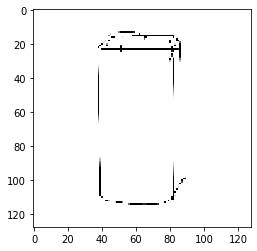

In [28]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [29]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [128,256,512,1024]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (8, 8, 1024)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [512,256,128,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  9728      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  3277312   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [31]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 65536)             6619136   
_________________________________________________________________
batch_normalization (BatchNo (None, 65536)             262144    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 65536)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 1024)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 16, 16, 512)       13107712  
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 512)       2048

## training

In [32]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 100
N_CRITIC = 5
BATCH_SIZE = 128

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
0 (5, 1) [D loss: (-549.1)(R -584.8, F -21.3, G 5.7)] [G loss: 56.8]
1 (5, 1) [D loss: (-1147.8)(R -2207.6, F -63.3, G 112.3)] [G loss: 89.3]
2 (5, 1) [D loss: (-165.8)(R -177.3, F -351.7, G 36.3)] [G loss: -453.6]
3 (5, 1) [D loss: (-980.3)(R -1725.3, F 115.2, G 63.0)] [G loss: -164.9]
4 (5, 1) [D loss: (-901.8)(R -1895.8, F 253.3, G 74.1)] [G loss: -251.3]
5 (5, 1) [D loss: (-820.5)(R -1816.7, F 318.6, G 67.8)] [G loss: -314.2]
6 (5, 1) [D loss: (-740.2)(R -1712.6, F 375.8, G 59.7)] [G loss: -365.9]
7 (5, 1) [D loss: (-658.5)(R -1621.6, F 430.3, G 53.3)] [G loss: -418.2]
8 (5, 1) [D loss: (-597.3)(R -1517.5, F 458.8, G 46.1)] [G loss: -452.0]
9 (5, 1) [D loss: (-541.1)(R -1442.3, F 484.2, G 41.7)] [G loss: -465.5]
10 (5, 1) [D loss: (-494.4)(R -1361.4, F 493.3, G 37.4)] [G loss: -483.6]
11 (5, 1) [D loss: (-459.8)(R -1304.9, F 501.9, G 34.3)] [G loss: -498.0]
12 (5, 1) [D loss: (-428.9)(R -1

104 (5, 1) [D loss: (-119.9)(R -367.6, F 181.7, G 6.6)] [G loss: -155.7]
105 (5, 1) [D loss: (-123.4)(R -360.6, F 164.5, G 7.3)] [G loss: -156.3]
106 (5, 1) [D loss: (-119.2)(R -336.3, F 153.4, G 6.4)] [G loss: -166.7]
107 (5, 1) [D loss: (-113.0)(R -384.9, F 208.9, G 6.3)] [G loss: -136.0]
108 (5, 1) [D loss: (-108.2)(R -343.1, F 168.4, G 6.6)] [G loss: -157.9]
109 (5, 1) [D loss: (-110.4)(R -358.0, F 184.3, G 6.3)] [G loss: -161.9]
110 (5, 1) [D loss: (-120.9)(R -350.1, F 165.3, G 6.4)] [G loss: -132.7]
111 (5, 1) [D loss: (-113.5)(R -304.9, F 127.9, G 6.3)] [G loss: -168.3]
112 (5, 1) [D loss: (-111.2)(R -272.9, F 97.1, G 6.5)] [G loss: -139.7]
113 (5, 1) [D loss: (-114.1)(R -320.1, F 137.7, G 6.8)] [G loss: -146.2]
114 (5, 1) [D loss: (-114.2)(R -284.0, F 103.5, G 6.6)] [G loss: -151.0]
115 (5, 1) [D loss: (-119.2)(R -285.5, F 104.0, G 6.2)] [G loss: -157.0]
116 (5, 1) [D loss: (-111.6)(R -281.4, F 97.3, G 7.3)] [G loss: -155.7]
117 (5, 1) [D loss: (-105.0)(R -345.9, F 163.8, G 7.7

218 (5, 1) [D loss: (-87.7)(R -295.7, F 165.8, G 4.2)] [G loss: -174.9]
219 (5, 1) [D loss: (-81.2)(R -296.2, F 170.0, G 4.5)] [G loss: -152.0]
220 (5, 1) [D loss: (-84.8)(R -287.5, F 162.7, G 4.0)] [G loss: -175.5]
221 (5, 1) [D loss: (-84.5)(R -256.8, F 137.4, G 3.5)] [G loss: -175.1]
222 (5, 1) [D loss: (-83.8)(R -294.8, F 171.9, G 3.9)] [G loss: -178.0]
223 (5, 1) [D loss: (-82.2)(R -290.6, F 167.6, G 4.1)] [G loss: -180.5]
224 (5, 1) [D loss: (-85.1)(R -265.8, F 140.7, G 4.0)] [G loss: -157.0]
225 (5, 1) [D loss: (-85.7)(R -257.0, F 133.1, G 3.8)] [G loss: -172.3]
226 (5, 1) [D loss: (-80.0)(R -230.5, F 116.1, G 3.4)] [G loss: -148.4]
227 (5, 1) [D loss: (-85.9)(R -280.1, F 147.2, G 4.7)] [G loss: -133.9]
228 (5, 1) [D loss: (-85.0)(R -273.9, F 143.3, G 4.6)] [G loss: -129.5]
229 (5, 1) [D loss: (-86.4)(R -263.5, F 136.6, G 4.1)] [G loss: -161.4]
230 (5, 1) [D loss: (-83.3)(R -246.6, F 128.6, G 3.5)] [G loss: -139.5]
231 (5, 1) [D loss: (-87.6)(R -282.2, F 149.8, G 4.5)] [G loss: 

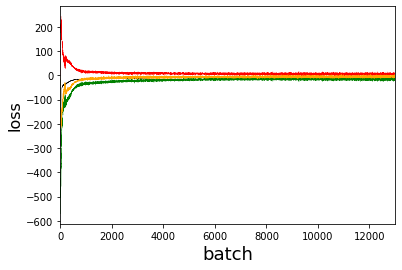

In [86]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 13000)
# plt.ylim(0, 2)

plt.show()
